In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import sklearn as skl

In [2]:
print(os.getcwd())
os.chdir("../")
os.chdir("data/")
lap_times = pd.read_csv("lap_times.csv")
qualifying = pd.read_csv("qualifying.csv")
os.chdir("../")
os.chdir("max/")
print(os.getcwd())

C:\LocalProjects\Python\POCS\300-Project\max
C:\LocalProjects\Python\POCS\300-Project\max


In [3]:
# holds all laps for each race at the index = raceId
r = []
for i in range(max(lap_times['raceId'])):
    if i % 100 == 0:
        print(i, end = ' ')
    # df.loc[df['column_name'] == some_value]
    temp = lap_times.copy()
    temp = temp.loc[lap_times['raceId'] == i]
    r.append(temp)

# looking for races with more than 400 laps between all drivers
# this is to insure that the data is not too sparse
temp = [race for race in r if len(race) >= 400]
r = temp
print(len(r))

0 100 200 300 400 500 600 700 800 900 1000 

In [4]:
qual = []
for raceId in range(len(r)):
    temp = qualifying.copy()
    temp = temp.loc[qualifying['raceId'] == raceId]
    qual.append(temp)

In [5]:
# get all unique driverIds
driversIds = r.copy()
for i in range(len(driversIds)):
    driversIds[i] = driversIds[i]['driverId'].unique()

driver_ids = []
for list in driversIds:
    for item in list:
        if item not in driver_ids:
            driver_ids.append(item)

print(driver_ids)

[1, 13, 8, 9, 2, 4, 12, 15, 10, 7, 67, 17, 20, 3, 6, 16, 21, 18, 22, 5, 153, 69, 154, 24, 155, 14, 11, 19, 23, 25, 26, 27, 28, 29, 31, 30, 32, 35, 33, 34, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 41, 49, 52, 51, 50, 53, 56, 59, 62, 63, 66, 57, 54, 58, 55, 60, 61, 65, 64, 70, 68, 71, 72, 76, 73, 75, 74, 77, 78, 79, 81, 82, 84, 83, 85, 86, 807, 808, 812, 811, 810, 814, 815, 813, 816, 817, 818, 819, 822, 821, 824, 820, 823, 825, 826, 828, 827, 829, 832, 831, 830, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 845, 844, 846, 848, 847, 849, 851, 850, 852, 854, 853, 855]


In [6]:
num_pos_start = []
num_pos_end = []

# finding how many cars are in the race at the start
for i in range(len(r)):
    temp = r[i].copy()
    # find the first lap
    first_lap = temp['lap'].min()
    # find the number of cars in the first lap
    temp = temp.loc[temp['lap'] == first_lap]
    num_pos_start.append(len(temp))

print(num_pos_start[1:5])

# finding how many total cars are in the race on the last lap
for i in range(len(r)):
    temp = r[i].copy()
    # find the last lap
    last_lap = temp['lap'].max()
    # find the number of cars in the last lap
    temp = temp.loc[temp['lap'] == last_lap]
    num_pos_end.append(len(temp))

print(num_pos_end[1:5])

[19, 20, 20, 16]
[14, 13, 13, 8]


In [17]:
starting = []

for i in range(1, max(lap_times['raceId'])+1):
    # gets all laps from race
    race = lap_times[lap_times['raceId'] == i]
    # looks for first lap
    start = race[race['lap'] == 1]
    temp = []
    # order by position on first lap
    for j in range(1, len(start)+1):
        temp.append(start[start['position'] == j])

    temp2 = []
    # add to starting list
    for j in range(len(temp)):
        temp2.append(temp[j].iloc[0])

    starting.append(temp2)

print(starting[0][0])

raceId                 1
driverId              18
lap                    1
position               1
time            1:35.652
milliseconds       95652
Name: 343770, dtype: object


In [18]:
# extract only the driverId and position
starting_pos = []
for i in range(len(starting)):
    temp = []
    for j in range(len(starting[i])):
        # temp.append([starting[i][j]['driverId'], starting[i][j]['position']])
        temp.append(starting[i][j]['driverId'])
    starting_pos.append(temp)

print(starting_pos[0])

[18, 20, 13, 9, 8, 3, 22, 6, 12, 67, 21, 7, 1, 4, 15, 10, 2, 16, 17]


In [9]:
# returns the order of the drivers during a given lap in a race
# remove race id from the array
def get_order(data, lap):
    temp = data.copy()
    temp = temp.loc[data['lap'] == lap]
    temp = temp.sort_values(by=['position'])
    temp = temp['driverId'].to_numpy()
    return temp

# flatten a list
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

In [10]:
ending_pos = []

for ra in range(len(r) - 1):
    # find last lap in current race
    last_lap = r[ra]['lap'].iloc[-1]
    # get the order of the drivers at the last lap
    last_lap_order = get_order(r[ra], last_lap)
    # add it to the ending_pos list
    ending_pos.append(last_lap_order)

ending_pos = np.array(ending_pos)
print(ending_pos[1])

[18  2 10 15 22 17  1  3 13  7  4  6 12  8]


C:\Users\xirce\AppData\Local\Temp\ipykernel_20324\3236080837.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ending_pos = np.array(ending_pos)


In [19]:
all_starts = []
all_ends = []

# get all starting positions of all racers in a flat array
for i in range(len(driver_ids)):
    curr_id = driver_ids[i]

    # for every race
    for j in range(len(r)-1):
        # get the starting and ending position lists
        st_list = starting_pos[j]
        end_list = ending_pos[j]
        # create a standardizer such that position changes are less affected by dropouts
        pos_standardizer = len(st_list) / len(end_list)
        # for every racer who didn't drop out, find their starting and ending position
        if curr_id in st_list and curr_id in end_list:
            all_starts.append(float(np.where(st_list == curr_id)[0][0])+1)
            all_ends.append((np.where(end_list == curr_id)[0][0]+1)*pos_standardizer)

# Reshape and transform the data for regression
all_starts = np.array(all_starts)
all_ends = np.array(all_ends)

all_starts = all_starts.reshape(-1, 1)
all_ends = all_ends.reshape(-1, 1)

print(len(all_starts))
print(len(all_ends))

3571
3571


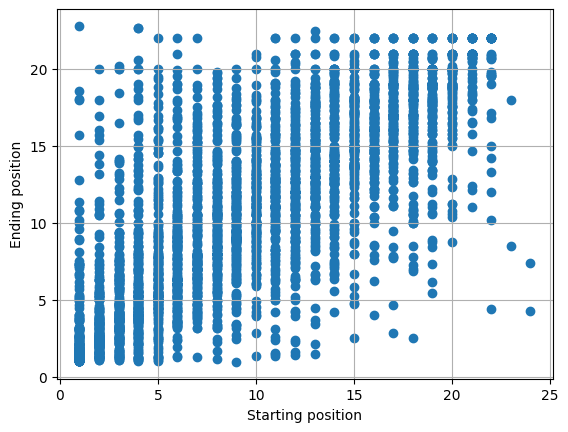

In [20]:
plt.scatter(all_starts, all_ends)
plt.grid()
plt.xlabel('Starting position')
plt.ylabel('Ending position')
plt.show()

c:\localprojects\python\pocs\300-project\venv\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


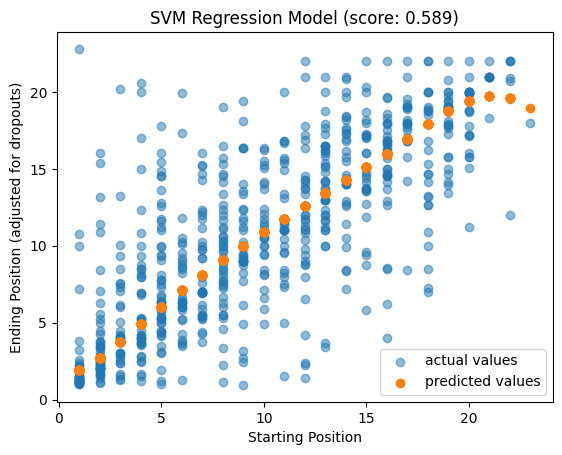

In [21]:
# Import the necessary modules
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Load the data and split it into training and testing sets
X = all_starts # The starting positions of the racers
y = all_ends # The corresponding ending positions of the racers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a SVR model and fit it to the training datas
svm = SVR()
svm.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = svm.predict(X_test)

# Evaluate the model's performance by comparing the predicted and actual ending positions
svm_score = round(svm.score(X_test, y_test), 3)

# Plot prediction and actual values
plt.scatter(X_test, y_test, label = 'actual values', alpha=0.5)
plt.scatter(X_test, y_pred, label = 'predicted values')
plt.xlabel('Starting Position')
plt.ylabel('Ending Position (adjusted for dropouts)')
plt.title('SVM Regression Model (score: ' + str(svm_score) + ')')
plt.legend()
plt.show()

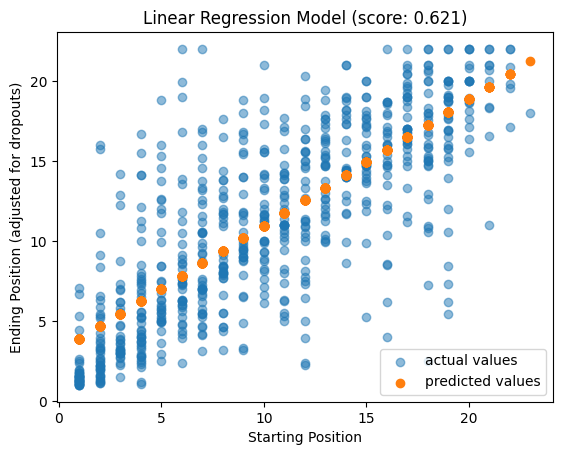

In [22]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model and fit it to the training data
lin = LinearRegression()
lin.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = lin.predict(X_test)

# Evaluate the model's performance by comparing the predicted and actual ending positions
lin_score = round(lin.score(X_test, y_test), 3)

# Plot prediction and actual values
plt.scatter(X_test, y_test, label = 'actual values', alpha=0.5)
plt.scatter(X_test, y_pred, label = 'predicted values')
plt.xlabel('Starting Position')
plt.ylabel('Ending Position (adjusted for dropouts)')
plt.title('Linear Regression Model (score: ' + str(lin_score) + ')')
plt.legend()
plt.show()

C:\Users\xirce\AppData\Local\Temp\ipykernel_20324\517575670.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rft.fit(X_train, y_train)


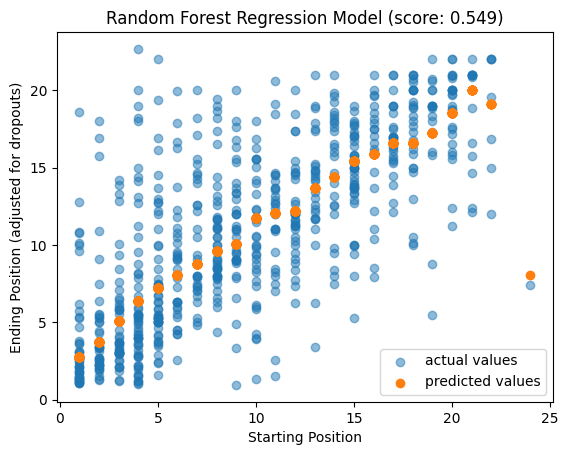

In [23]:
# Import the necessary modules
from sklearn.ensemble import RandomForestRegressor

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model and fit it to the training data
rft = RandomForestRegressor()
rft.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = rft.predict(X_test)

# Evaluate the model's performance by comparing the predicted and actual ending positions
rft_score = round(rft.score(X_test, y_test), 3)

# Plot prediction and actual values
plt.scatter(X_test, y_test, label = 'actual values', alpha=0.5)
plt.scatter(X_test, y_pred, label = 'predicted values')
plt.xlabel('Starting Position')
plt.ylabel('Ending Position (adjusted for dropouts)')
plt.title('Random Forest Regression Model (score: ' + str(rft_score) + ')')
plt.legend()
plt.show()

c:\localprojects\python\pocs\300-project\venv\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xirce\AppData\Local\Temp\ipykernel_20324\1115589194.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rft.fit(X_train, y_train)
c:\localprojects\python\pocs\300-project\venv\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xirce\AppData\Local\Temp\ipykernel_20324\1115589194.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

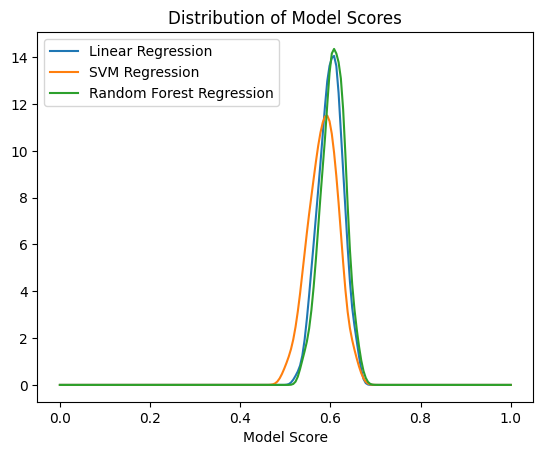

In [24]:
# Distribution of model scores
from scipy.stats import gaussian_kde

# create empty lists
l_scores = []
s_scores = []
f_scores = []

for i in range(300):
    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Create the models
    lin.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    rft.fit(X_train, y_train)

    # Get the scores
    lin_score = round(lin.score(X_test, y_test), 3)
    svm_score = round(svm.score(X_test, y_test), 3)
    rft_score = round(rft.score(X_test, y_test), 3)

    # Add scores to lists
    l_scores.append(lin_score)
    s_scores.append(svm_score)
    f_scores.append(rft_score)

# Plot densities

l_density = gaussian_kde(l_scores)
s_density = gaussian_kde(s_scores)
f_density = gaussian_kde(f_scores)
xs = np.linspace(0, 1, 200)
plt.plot(xs, l_density(xs), label='Linear Regression')
plt.plot(xs, s_density(xs), label='SVM Regression')
plt.plot(xs, f_density(xs), label='Random Forest Regression')
plt.xlabel("Model Score")
plt.legend()
plt.title('Distribution of Model Scores')
plt.show()